In [1]:
import os, sys
import numpy as np
import pandas as pd
import cv2 as cv
from io import StringIO
from PIL import Image
from mtcnn import MTCNN
from DDDS.face import build_model, face_detect
import matplotlib.pyplot as plt

2022-03-15 20:30:33.493910: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/jan/.pyenv/versions/3.8.12/envs/3DS/lib/python3.8/site-packages/cv2/../../lib64:
2022-03-15 20:30:33.493960: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
mtcnn = MTCNN()
KSS_model = build_model()

2022-03-15 20:30:35.568668: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/jan/.pyenv/versions/3.8.12/envs/3DS/lib/python3.8/site-packages/cv2/../../lib64:
2022-03-15 20:30:35.568709: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-15 20:30:35.568725: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (JKR-LT): /proc/driver/nvidia/version does not exist
2022-03-15 20:30:35.568886: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
VIDEO_PATH = '../data/red_or_green_line.avi'
capture = cv.VideoCapture(os.path.abspath(VIDEO_PATH))

In [4]:
play = True
KSS_probas = []
frame_no = 0
while play:
    frame_no += 1
    print(f"\rWorking on frame {frame_no}", end='\r')
    
    play, frame = capture.read()
    if frame_no % 30 != 0:
        continue
        
    frame_image = Image.fromarray(frame)
    crop_frame = face_detect(frame, mtcnn)
    
    if crop_frame is None:
        continue
    
    KSS_probas.append((frame_no, KSS_model.predict(np.expand_dims(crop_frame, axis=0))[0]))

<AxesSubplot:>

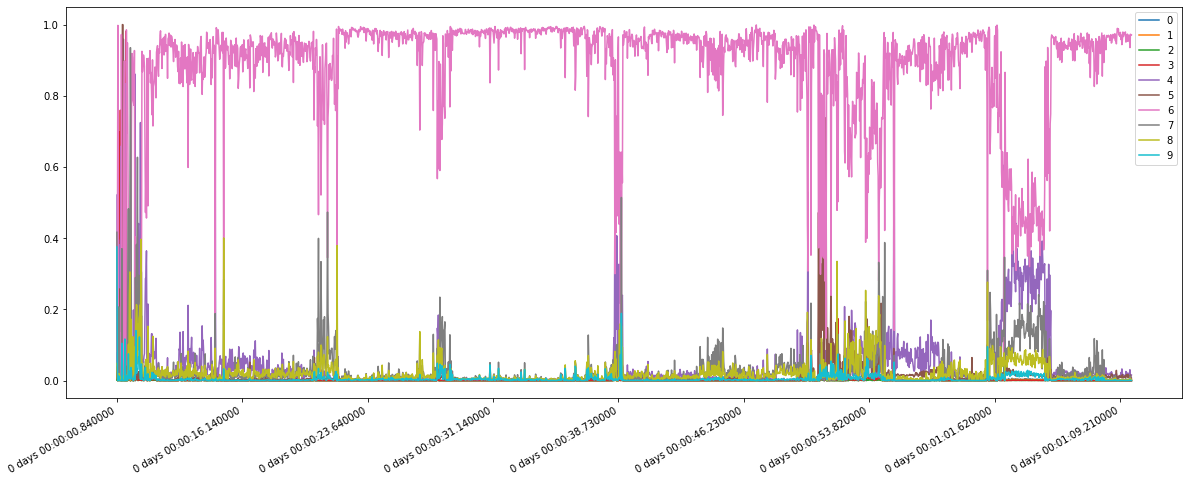

In [58]:
from matplotlib.dates import DateFormatter

index, data = ([row[0] for row in KSS_probas], [row[1] for row in KSS_probas])
time = pd.TimedeltaIndex(index, unit='ms')
pd.DataFrame(data, index=time).plot(figsize=(20,8))